In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets

1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset? Play around a bit and write up your findings and your process; you may choose to discuss these with your mentor. Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. For example, two of those clusters may map to a single flower type, while the other two map to the other types.

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

27.9 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


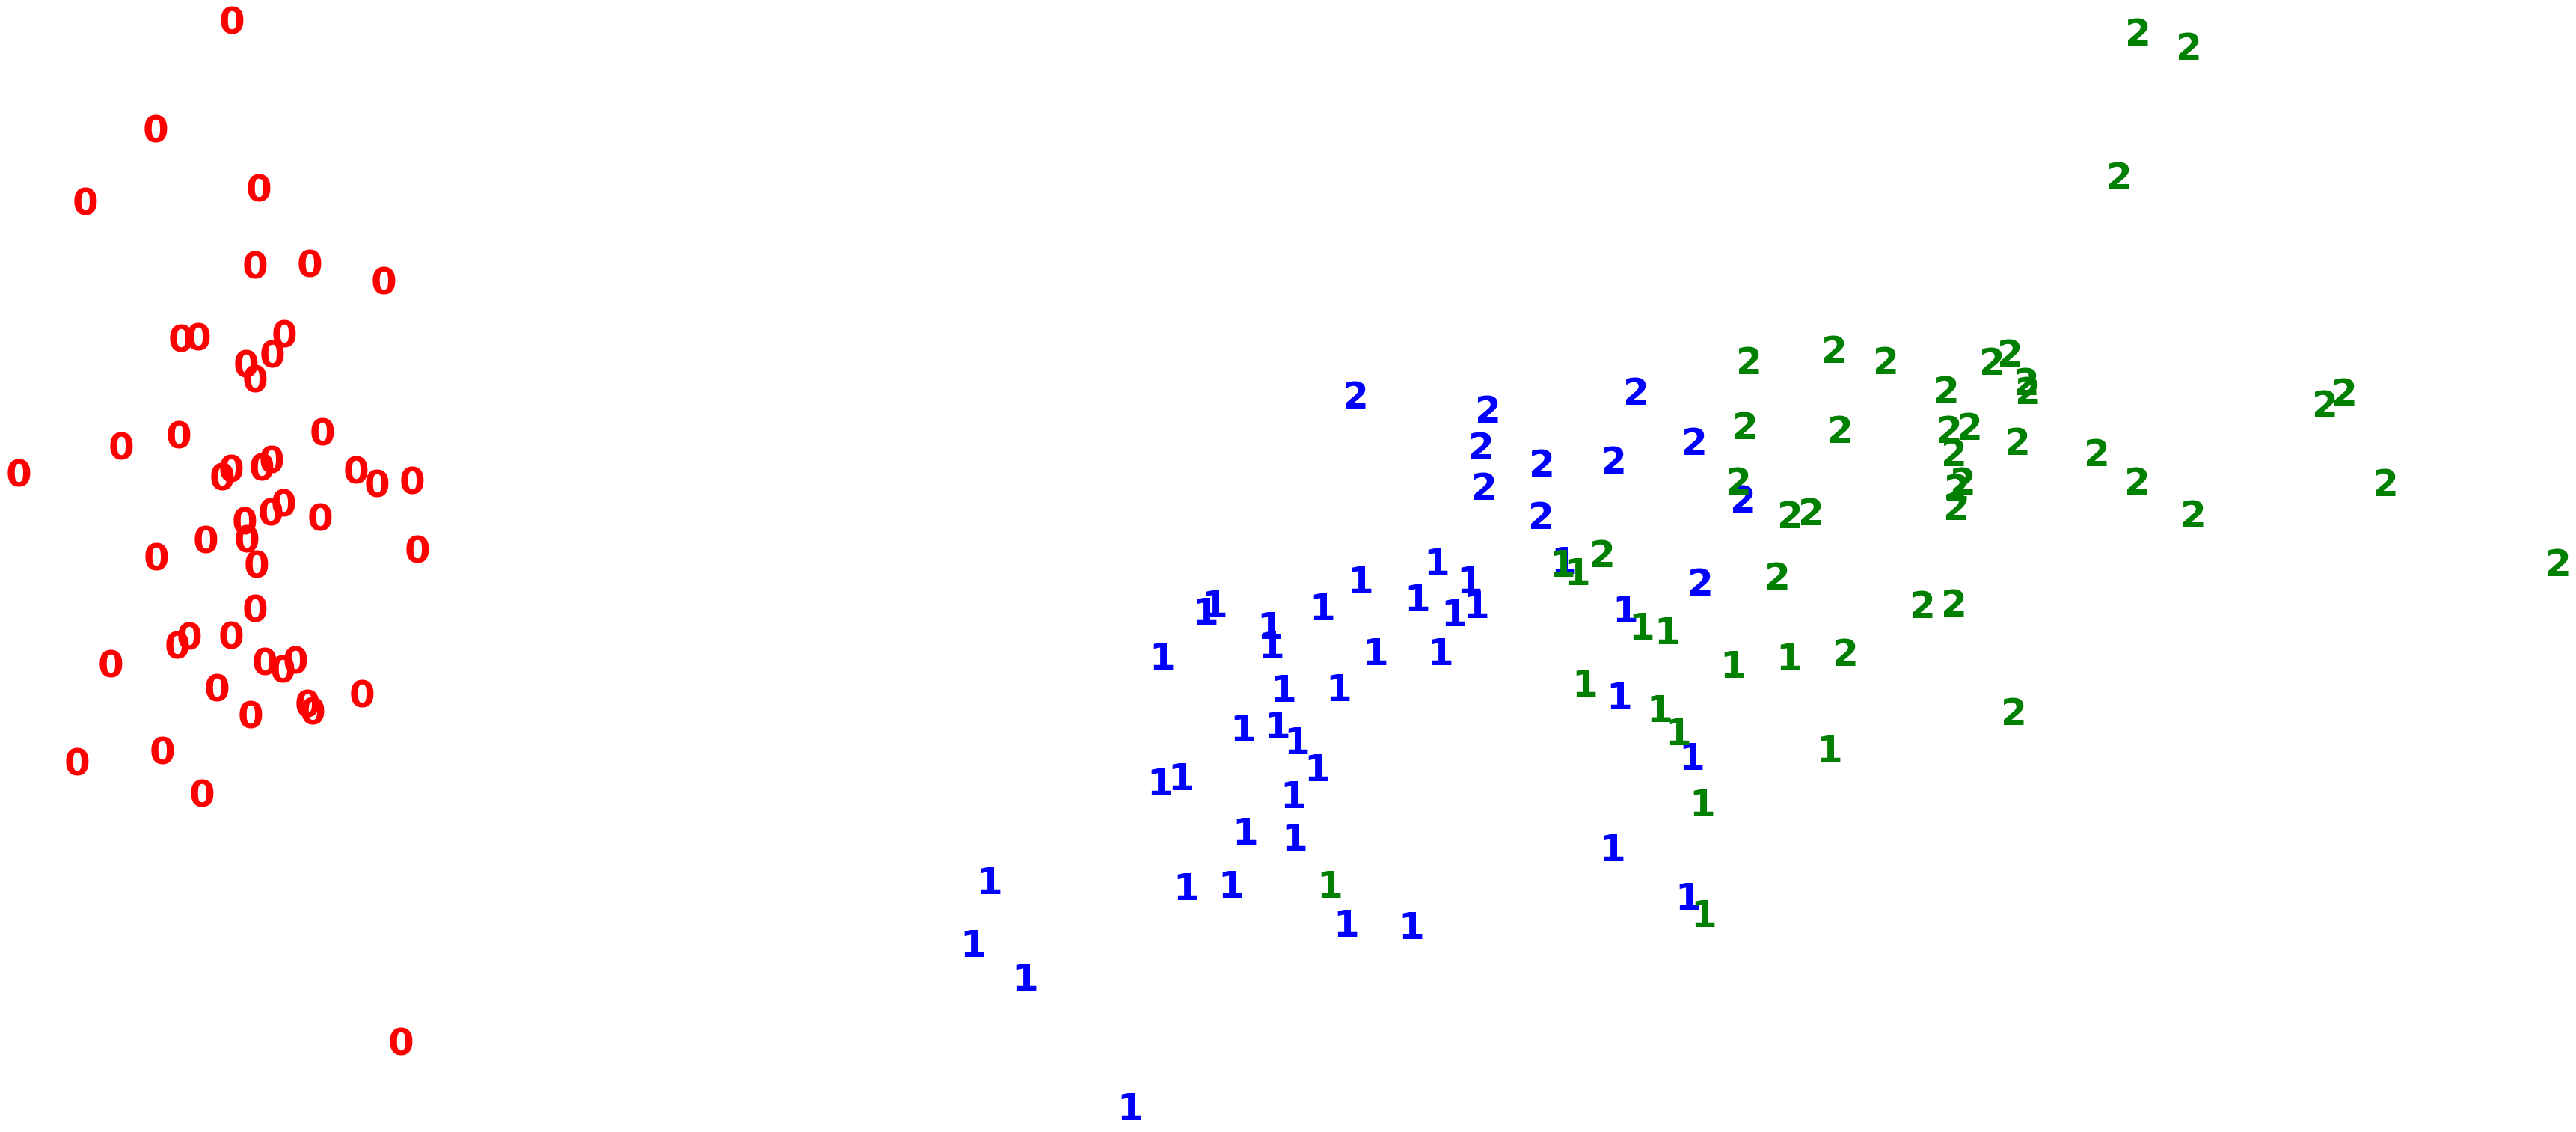

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

38.8 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


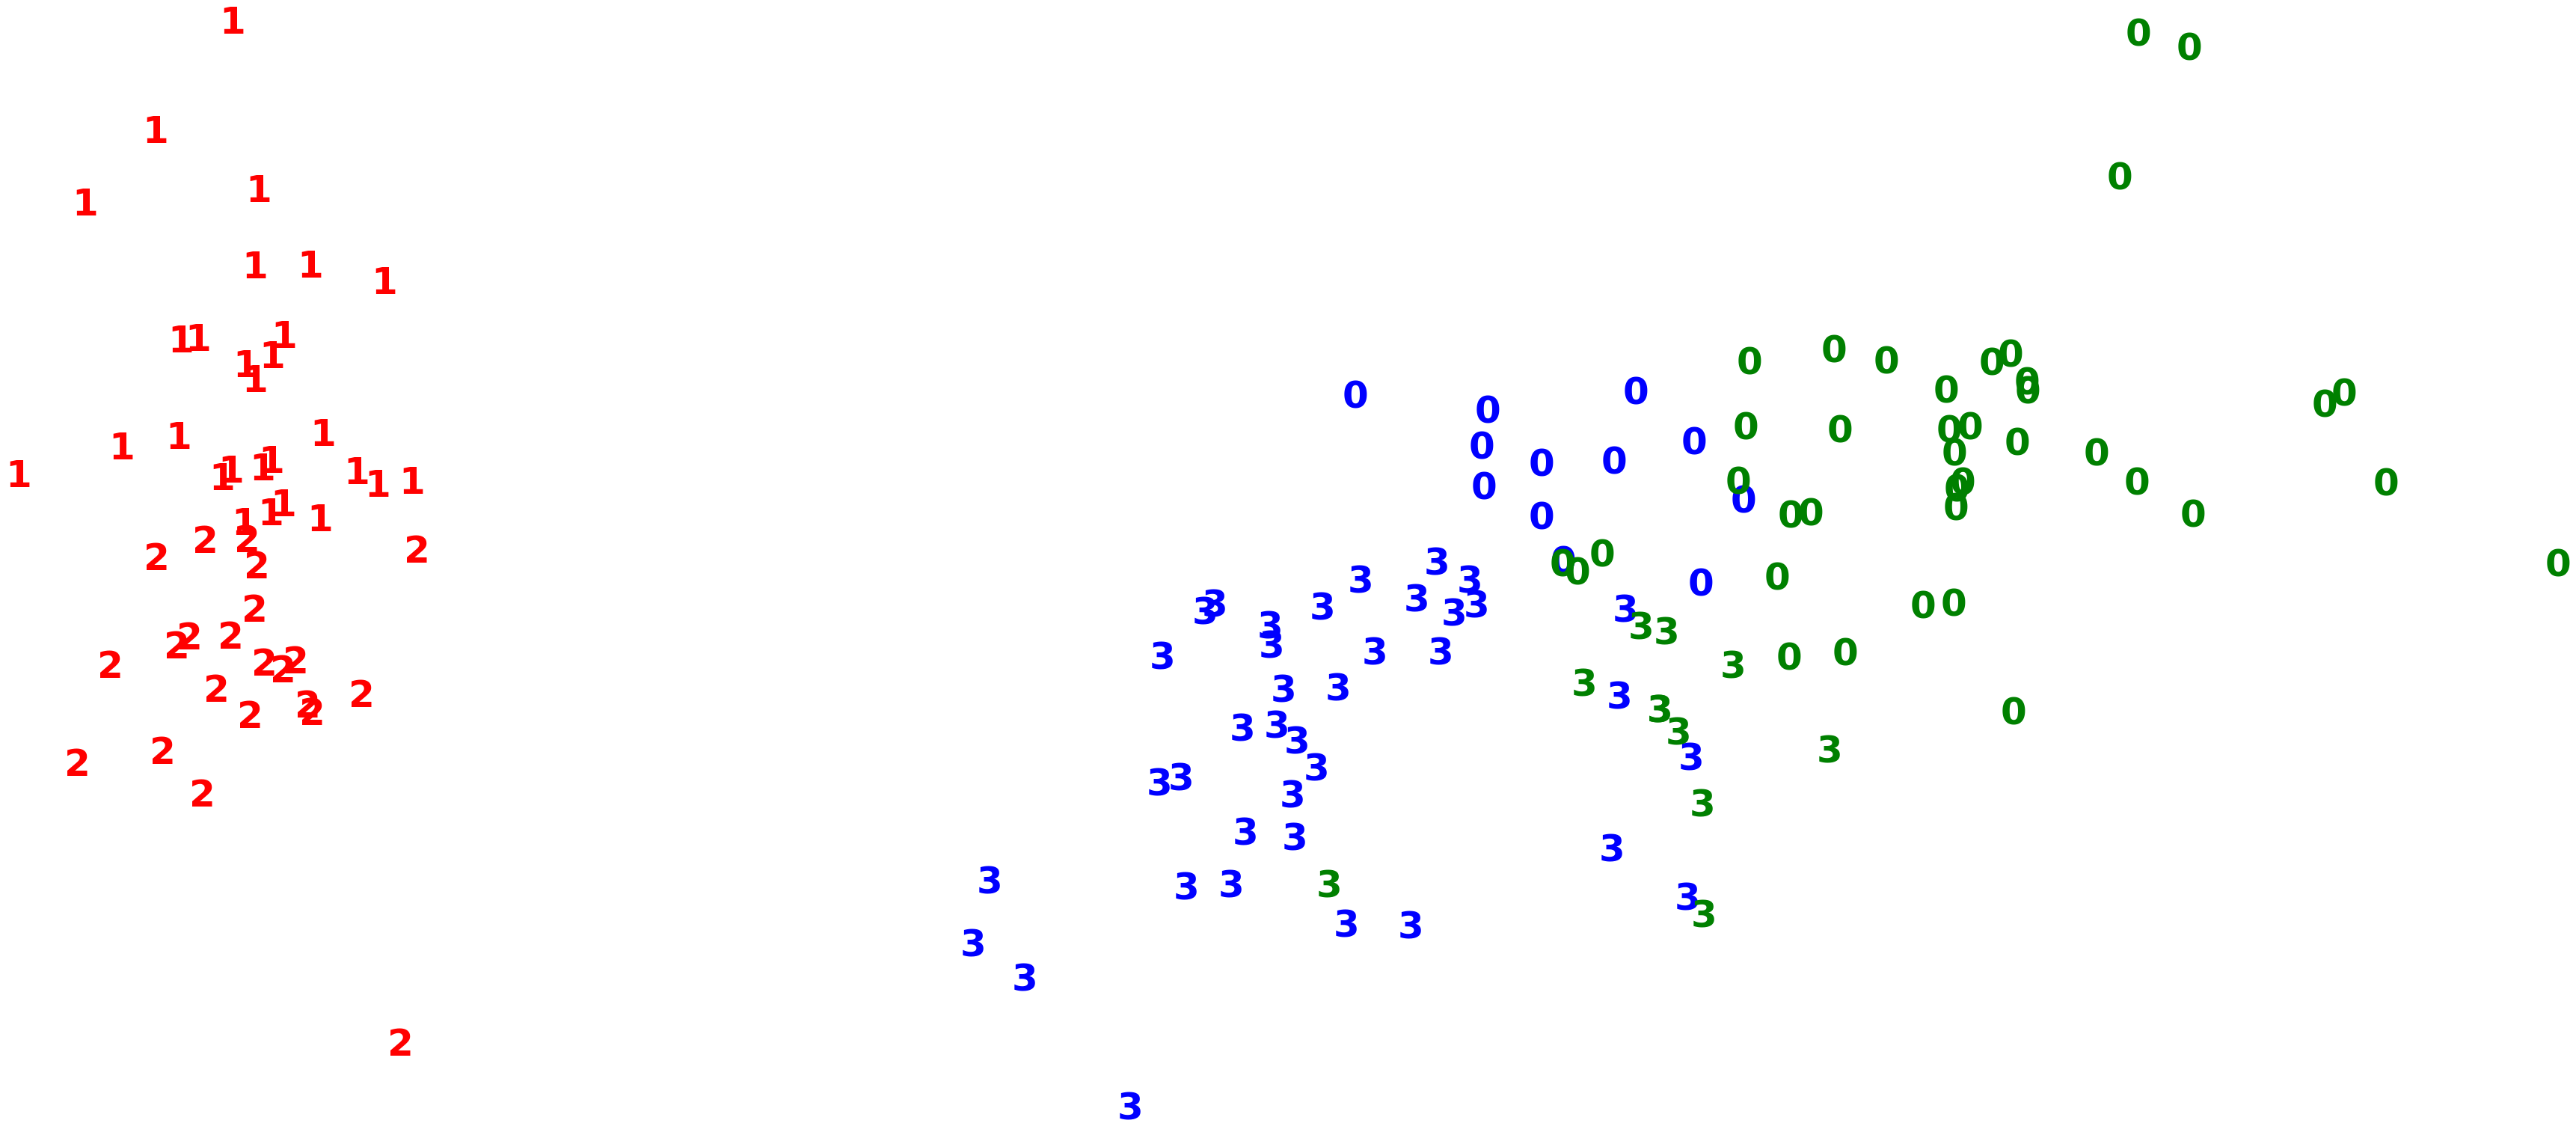

In [5]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Load the dataset from Thinkful's database. To connect to the database, use these credentials:
 postgres_user = 'dsbc_student'
 postgres_pw = '7*.8G9QH21'
 postgres_host = '142.93.121.174'
 postgres_port = '5432'
 postgres_db = 'heartdisease'

In [6]:
from sqlalchemy import create_engine

In [7]:
postgres_user = 'dsbc_student' 
postgres_pw = '7*.8G9QH21' 
postgres_host = '142.93.121.174' 
postgres_port = '5432' 
postgres_db = 'heartdisease'

engine = create_engine(f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}')

In [8]:
sql = """
    SELECT * FROM heartdisease
"""

heartdisease_df = pd.read_sql(sql, engine)
engine.dispose()

In [9]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

72.3 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


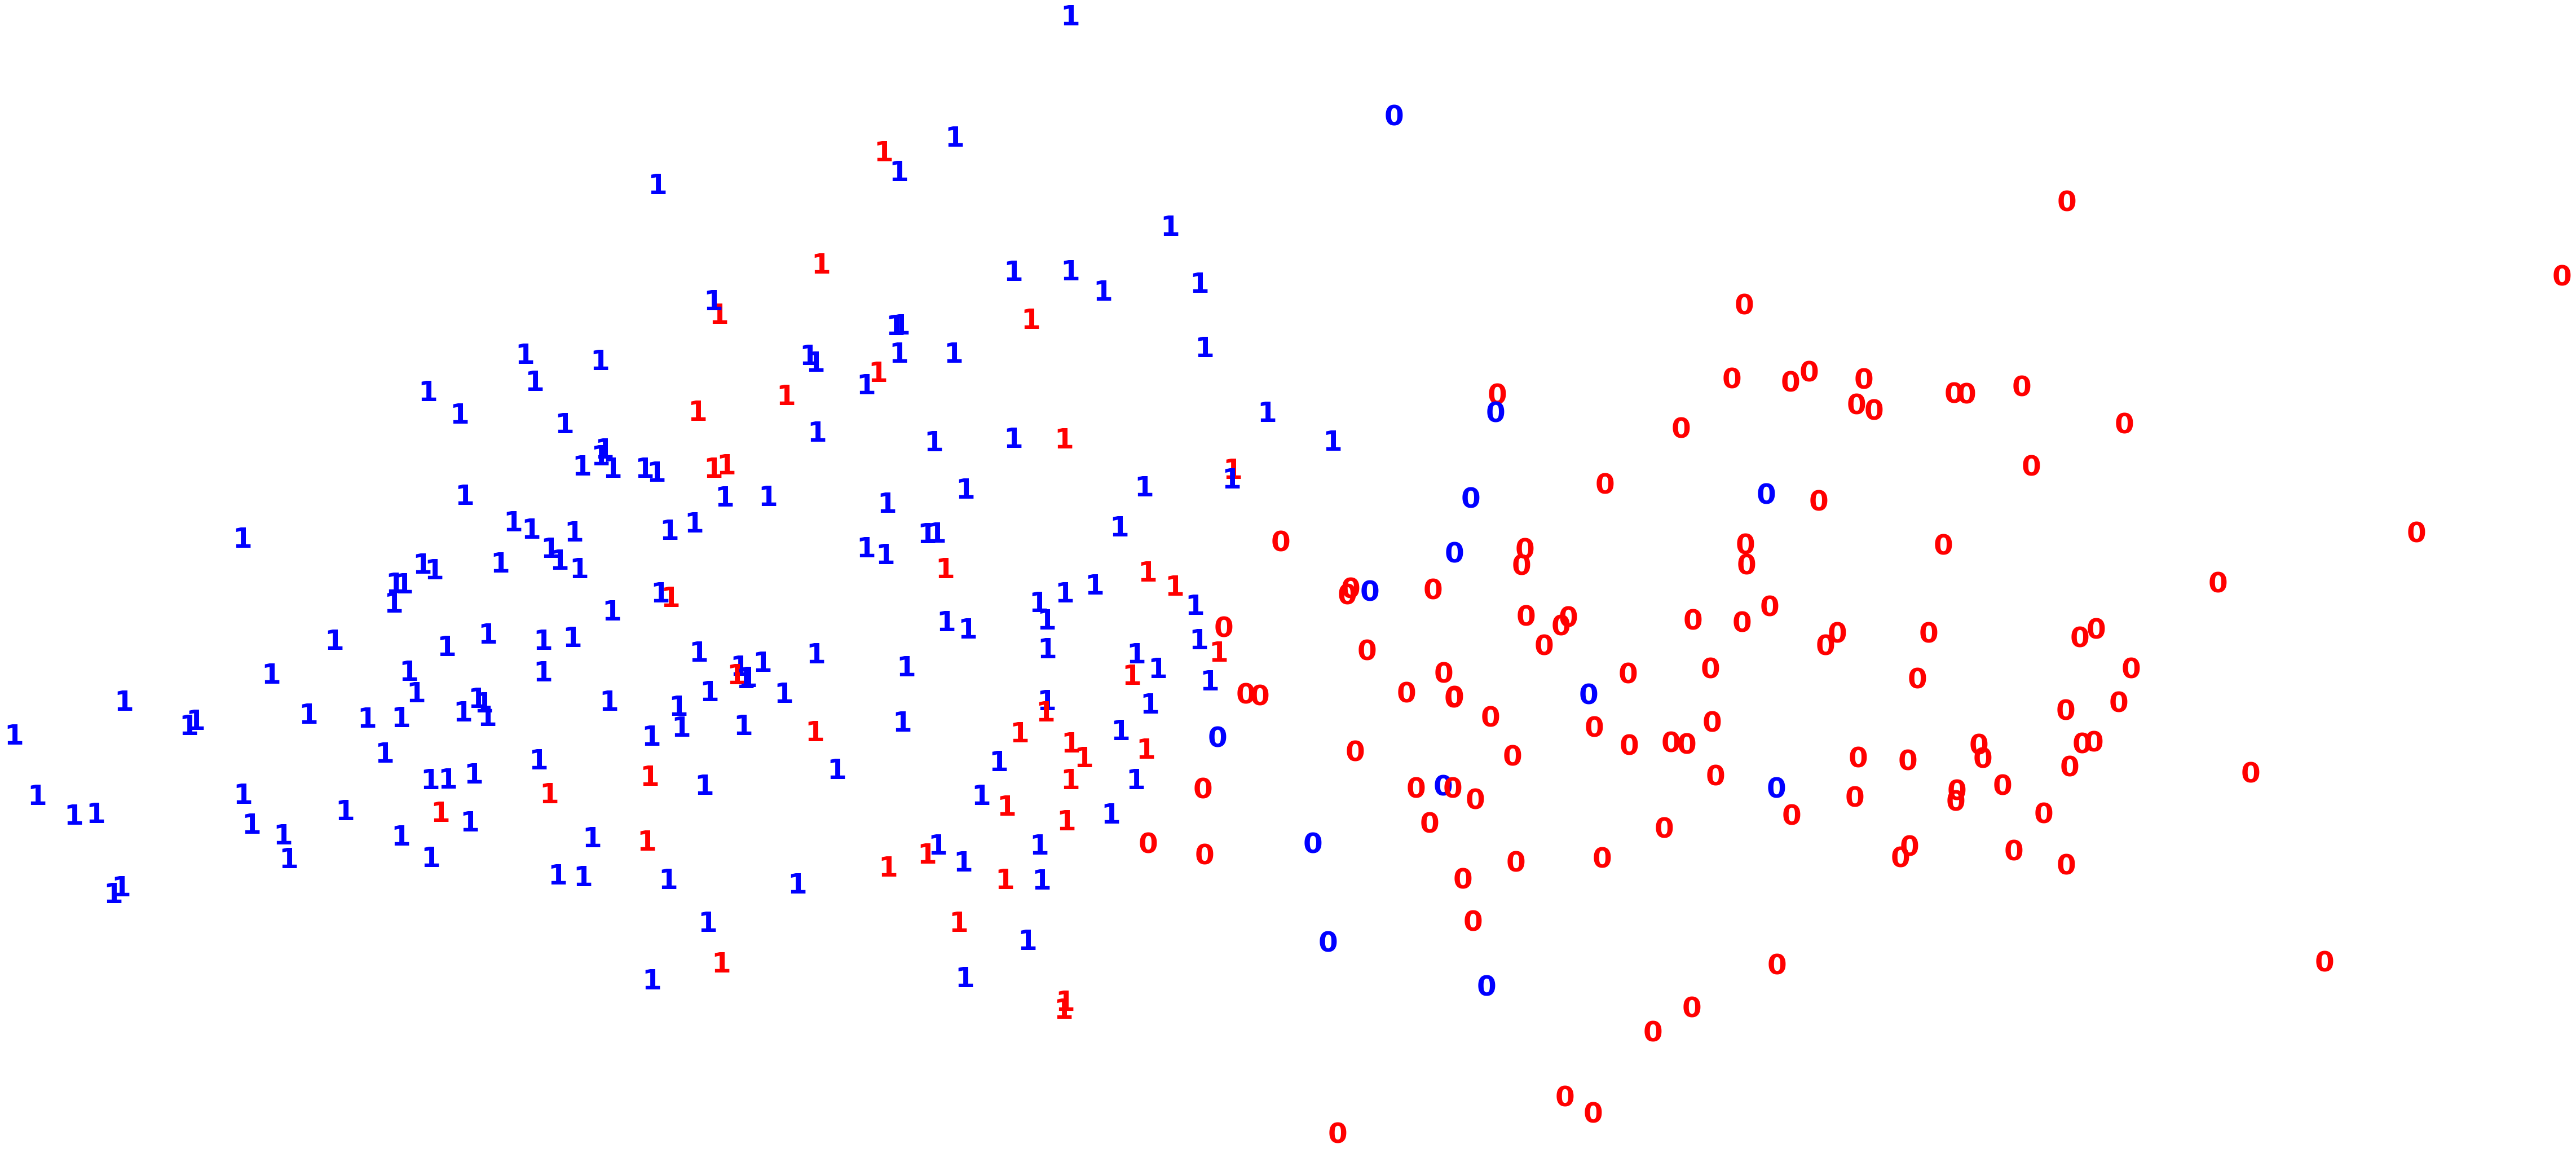

In [21]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, n_init=20)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       139
           1       0.80      0.92      0.86       164

    accuracy                           0.83       303
   macro avg       0.84      0.82      0.83       303
weighted avg       0.84      0.83      0.83       303

